In [ ]:
import pandas
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv


--2025-04-21 22:25:43--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/seattleWeather_1948-2017.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8003::154, 2606:50c0:8000::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762017 (744K) [text/plain]
Saving to: ‘seattleWeather_1948-2017.csv.1’

seattleWeather_1948 100%[===================>] 744.16K  3.55MB/s    in 0.2s    

2025-04-21 22:25:44 (3.55 MB/s) - ‘seattleWeather_1948-2017.csv.1’ saved [762017/762017]



In [21]:
data = pandas.read_csv('seattleWeather_1948-2017.csv',parse_dates=['date'])
data.head()
tempdf = data[[d.month == 1 for d in data.date]]

In [14]:
tempdf

,date,amount_of_precipitation,max_temperature,min_temperature,rain
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25229,2017-01-27,0.00,54,37,False
25230,2017-01-28,0.00,52,37,False
25231,2017-01-29,0.03,48,37,True
25232,2017-01-30,0.02,45,40,True


/tmp/ipykernel_11603/2112983637.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


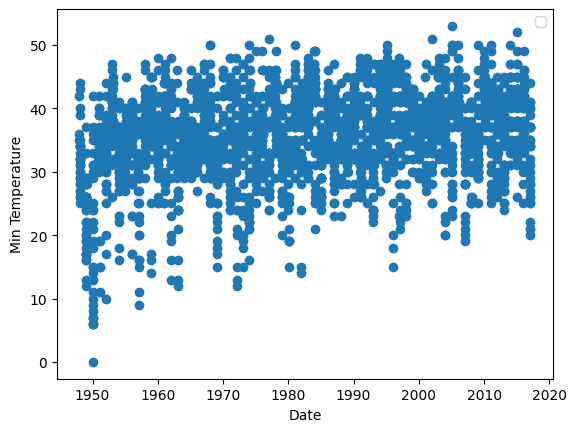

In [15]:
import matplotlib.pyplot as plt
plt.scatter(tempdf['date'],tempdf['min_temperature'])
plt.xlabel('Date')
plt.ylabel('Min Temperature')
plt.legend()

what is scaling -> A data preprocessing technique that transforms the values of numerical features in a dataset to a common scale or range

/tmp/ipykernel_11603/2008889612.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


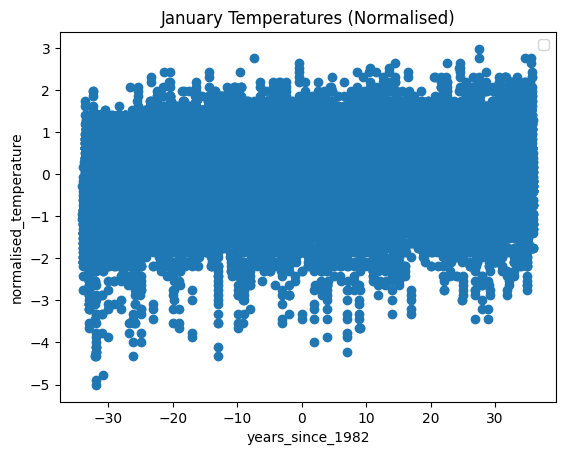

In [22]:
import numpy as np

# This block of code scales and offsets the data slightly, which helps the training process
# You don't need to understand this code. We'll cover these concepts in later learning material

# Offset date into number of years since 1982
data["years_since_1982"] = [(d.year + d.timetuple().tm_yday / 365.25) - 1982 for d in data.date]

# Scale and offset temperature so that it has a smaller range of values
data["normalised_temperature"] = (data["min_temperature"] - np.mean(data["min_temperature"])) / np.std(data["min_temperature"])

# Graph
plt.scatter(data["years_since_1982"], data["normalised_temperature"])
# add labels and legend
plt.xlabel("years_since_1982")
plt.ylabel("normalised_temperature")
plt.title("January Temperatures (Normalised)")
plt.legend()

In [23]:
data.head()

,date,amount_of_precipitation,max_temperature,min_temperature,rain,years_since_1982,normalised_temperature
0,1948-01-01,0.47,51,42,True,-33.997262,-0.282730
1,1948-01-02,0.59,45,36,True,-33.994524,-0.957444
2,1948-01-03,0.42,45,35,True,-33.991786,-1.069896
3,1948-01-04,0.31,45,34,True,-33.989049,-1.182349
4,1948-01-05,0.17,45,32,True,-33.986311,-1.407253


In [25]:
class MyModel:
    def __init__(self):
        self.slope = 0
        self.intercept =0
    def predict(self,date):
        return data * self.slope + self.intercept


In [27]:
model = MyModel()
print('model done')

model done


In [29]:
print(f"Model parameters before training: {model.intercept}, {model.slope}")

# Look at how well the model does before training
print("Model visualised before training:")


Model parameters before training: 0, 0
Model visualised before training:


In [30]:
def cost_function(actual_temperature, predicted_temperature):
    difference = actual_temperature - predicted_temperature
    cost = sum(difference **2)
    return difference ,cost

In [38]:
from m0b_optimizer import MyOptimizer


# Create an optimizer
optimizer = MyOptimizer()